In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.14.0'

In [3]:
tf.config.list_physical_devices("GPU")

[]

In [4]:
!nvidia-smi

Sun Oct 22 14:00:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P8              16W / 125W |   1255MiB /  6144MiB |     16%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [7]:
X_train_full.shape ##60,000 data points of 28*28 size images

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
img.shape

(28, 28)

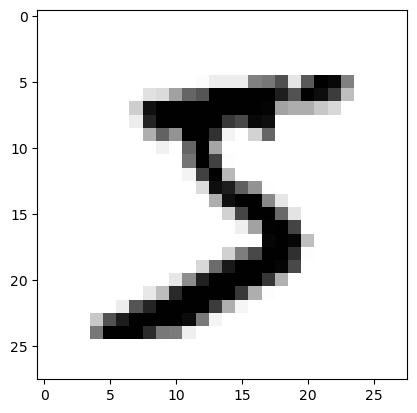

In [13]:
plt.imshow(img,cmap='binary')

<Axes: >

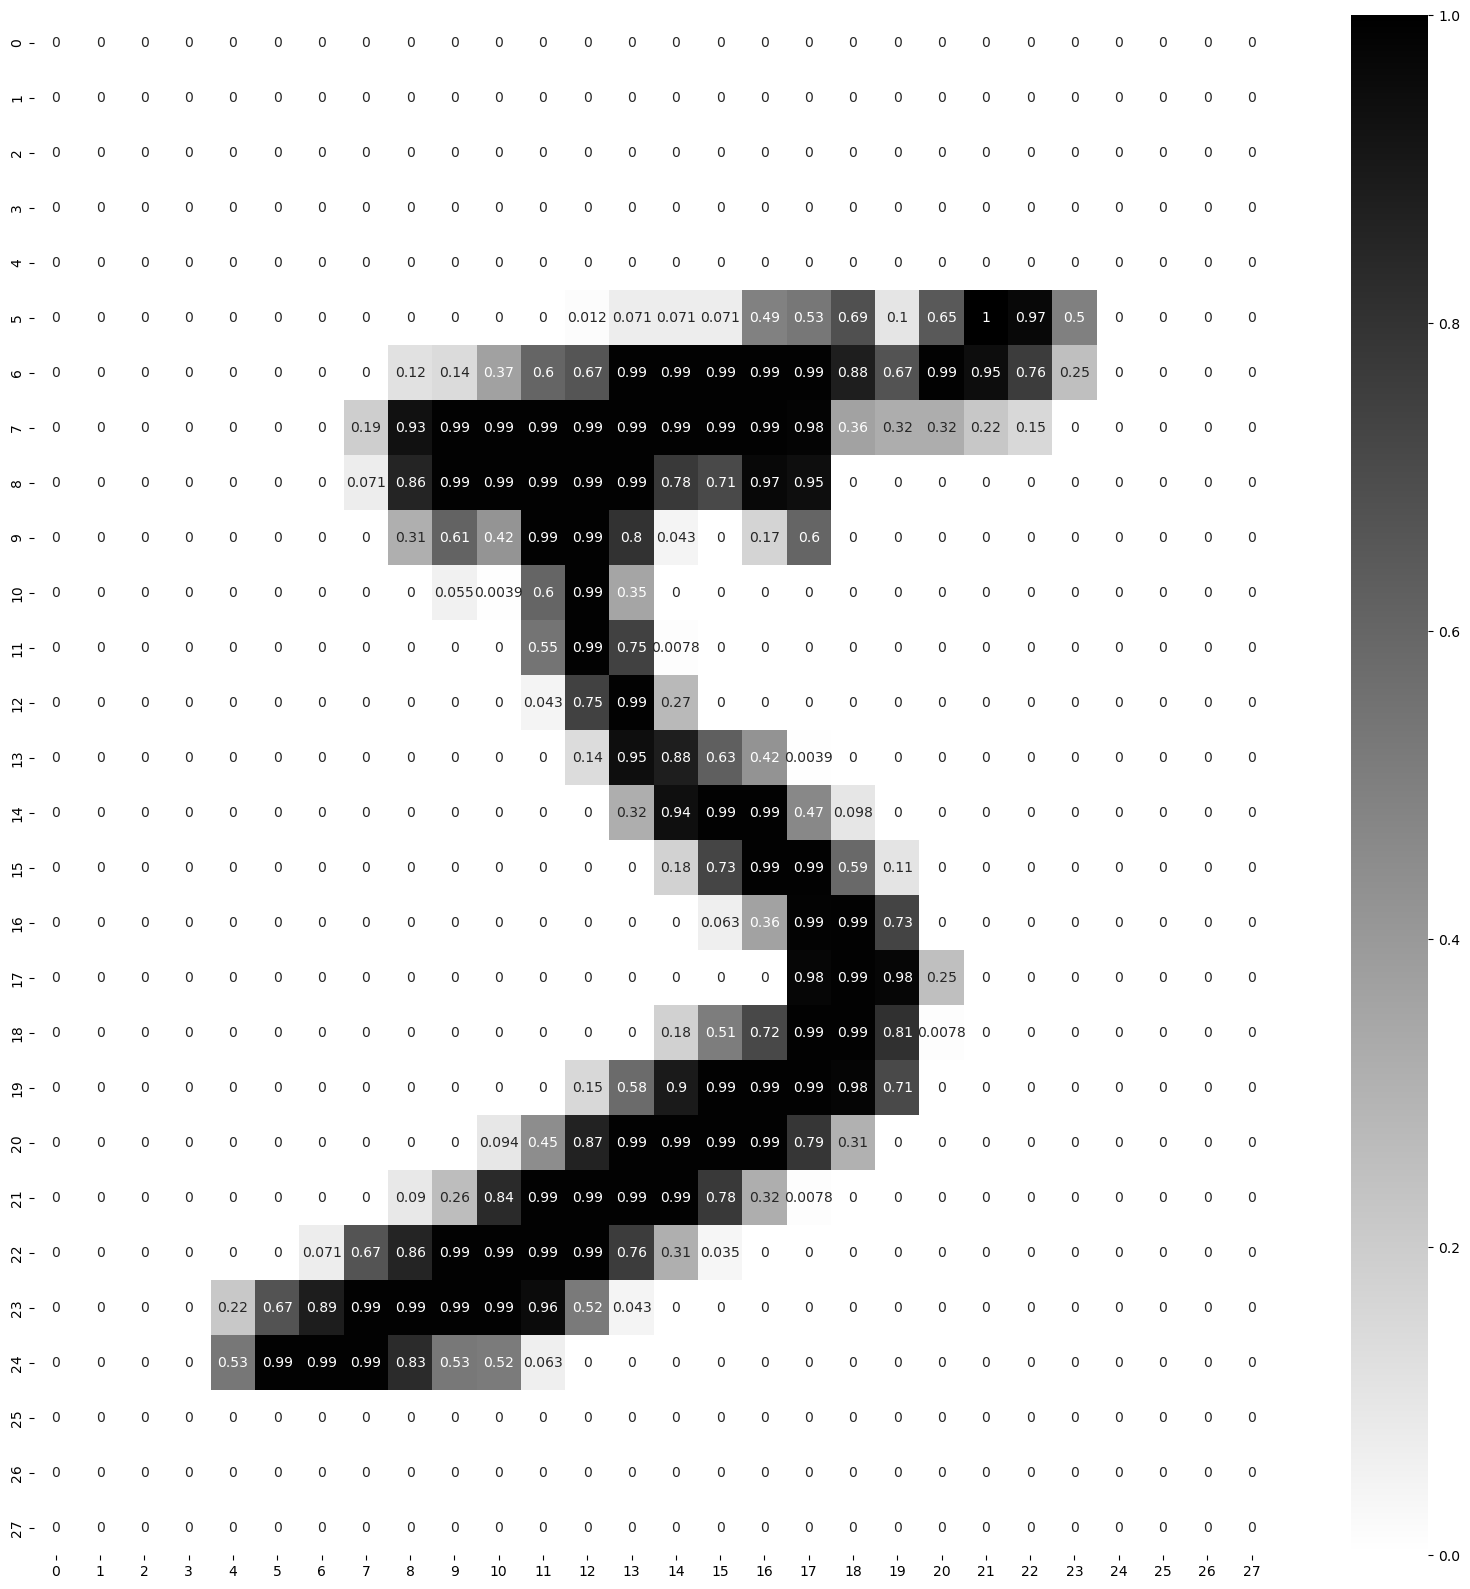

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True ,cmap='binary')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]




X_test = X_test / 255

In [16]:
CLASSES = 10

LAYERS = [
            tf.keras.layers.Flatten(input_shape =(28,28), name ='inputLayer'),
            tf.keras.layers.Dense(300 , activation="relu", name = 'hiddenlayer1'),
            tf.keras.layers.Dense(300 , activation="relu", name = 'hiddenlayer2'),
            tf.keras.layers.Dense(CLASSES, activation='softmax' , name = 'outputLayer')
]

In [17]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [19]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 300)               90300     
                                                                 
 outputLayer (Dense)         (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_clf.layers[1].name

'hiddenlayer1'

In [21]:
weights, baises = model_clf.layers[1].get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
baises.shape

(300,)

In [24]:
weights

array([[ 0.01127498,  0.04217957,  0.02006879, ...,  0.0663514 ,
         0.02797357,  0.06212315],
       [ 0.0228944 ,  0.06511246,  0.02322806, ...,  0.02335935,
         0.04359441,  0.04167454],
       [ 0.07135467,  0.01042134,  0.01565043, ...,  0.00562726,
        -0.01744984,  0.06329031],
       ...,
       [ 0.03417572,  0.06523696, -0.0220001 , ...,  0.01324911,
        -0.02231841, -0.04766873],
       [-0.01911183,  0.06829925, -0.02358835, ..., -0.01299005,
        -0.03140673,  0.03336854],
       [ 0.01122182, -0.03858576,  0.06877096, ...,  0.0203607 ,
         0.02539796, -0.0344406 ]], dtype=float32)

In [25]:
baises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, 
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [27]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train , 
                        epochs=EPOCHS, 
                        validation_data= VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6188 - accuracy: 0.8453 - val_loss: 0.3065 - val_accuracy: 0.9150
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.9176 - val_loss: 0.2410 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2383 - accuracy: 0.9322 - val_loss: 0.2040 - val_accuracy: 0.9420
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2035 - accuracy: 0.9411 - val_loss: 0.1774 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1775 - accuracy: 0.9489 - val_loss: 0.1615 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1570 - accuracy: 0.9557 - val_loss: 0.1452 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9602 - val_loss: 0.1326 - val_accuracy:

In [28]:
type(history.history)

dict

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.618814,0.845291,0.306494,0.9150
1,0.289927,0.917618,0.241033,0.9336
2,0.238327,0.932236,0.203959,0.9420
3,0.203478,0.941055,0.177418,0.9508
4,0.177547,0.948945,0.161547,0.9572
5,0.156960,0.955727,0.145187,0.9614
6,0.140753,0.960182,0.132608,0.9638
7,0.127008,0.964636,0.121700,0.9676
8,0.115424,0.967655,0.116895,0.9678
9,0.105744,0.970309,0.110099,0.9708


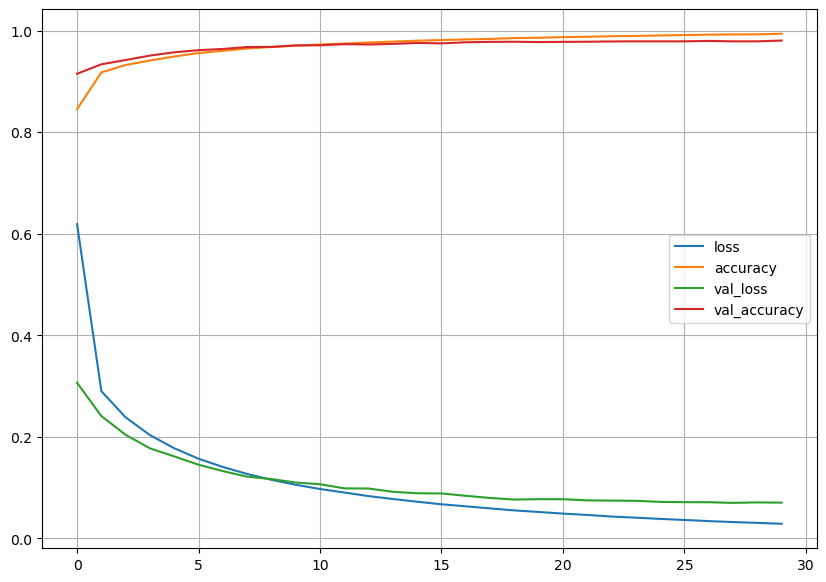

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [32]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9773


[0.07190661877393723, 0.9772999882698059]

In [33]:
X_test.shape

(10000, 28, 28)

In [34]:
X_test.shape[0]/32

312.5

In [35]:
model_clf.save('test.h5')

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
X_new = X_test[:3]


y_prob = model_clf.predict(X_new)

y_prob.round(3)

1/1 [==============================] - 0s 72ms/step


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

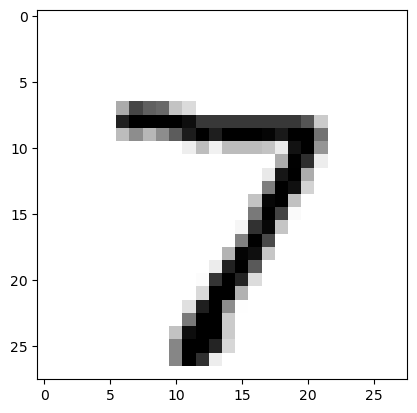

In [37]:
plt.imshow(X_new[0], cmap='binary')

In [41]:
Y_pred = np.argmax(y_prob , axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

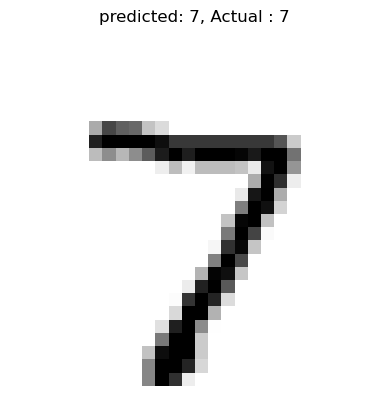

------------------------------------------------------------


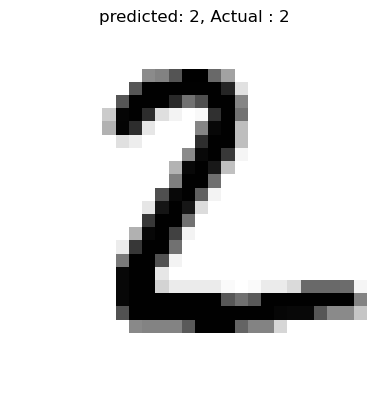

------------------------------------------------------------


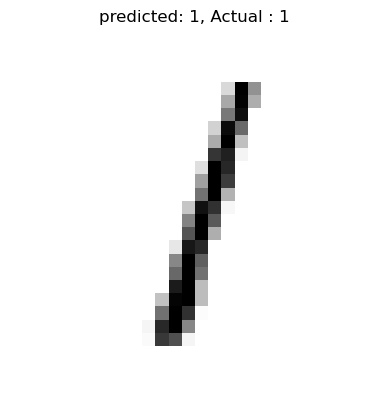

------------------------------------------------------------


In [43]:
for img_array , pred , actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap='binary')
    plt.title(f'predicted: {pred}, Actual : {actual}')
    plt.axis('off')
    plt.show()
    print("--"*30)